In [6]:
import tensorflow as tf

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.svm import SVC

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle


In [2]:
data = pd.read_csv("./processed_data.csv")

X = data[['C1E1', 'median', 'mean', 'std']].values
y = data['t_value'].values

# Split test and train datasets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2)

In [3]:
# Define the model architecture
param_grid = {'C': [0.1, 1, 10, 100],
              'gamma': [0.1, 1, 10, 100]}

model = SVC(kernel='rbf')
# model = SVC(kernel='rbf', C=1, gamma='scale')

# Perform grid search to find the best parameter values
grid_search = GridSearchCV(model, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Print the best parameter values
print(f"Best parameters: {grid_search.best_params_}")

# Make predictions on the test set using the best model
best_model = grid_search.best_estimator_

Best parameters: {'C': 100, 'gamma': 0.1}


Test accuracy: 0.955
              precision    recall  f1-score   support

           1       0.95      0.95      0.95       149
           2       0.94      0.97      0.95       153
           3       0.93      0.95      0.94       150
           4       0.97      0.97      0.97       174
           5       0.98      0.90      0.94       159
           6       1.00      0.99      1.00       160
           7       0.93      0.96      0.95       175

    accuracy                           0.96      1120
   macro avg       0.96      0.96      0.96      1120
weighted avg       0.96      0.96      0.96      1120



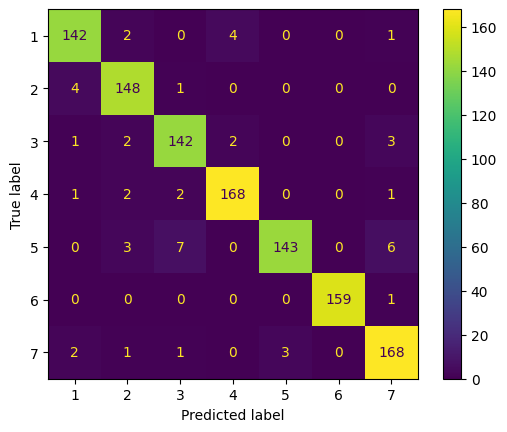

In [7]:
# Make predictions on the test set
y_pred = best_model.predict(X_test)

# Compute the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Test accuracy: {accuracy:.3f}')

report = classification_report(y_test,y_pred)
print(report)

# Generating the confusion matrix for the model
conf_mat = np.array(confusion_matrix(y_test, y_pred))
cm_display = ConfusionMatrixDisplay(
    confusion_matrix=conf_mat, display_labels=[x+1 for x in range(7)])
cm_display.plot()
plt.show()

In [ ]:
model_name = "svm_v1"

pickle.dump(model,open(f"models/{model_name}.pickle","wb"))
model = pickle.load(open(f"models/{model_name}.pickle","rb"))